In [30]:
import os

## DEFINING PATHS

In [31]:
CUSTOM_MODEL_NAME = 'SSD_MobNet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [32]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [33]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [34]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}

## SETTING UP SSD MOBNET MODEL

In [35]:
import wget

In [36]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  55% (1767/3188)
Updating files:  56% (1786/3188)
Updating files:  57% (1818/3188)
Updating files:  58% (1850/3188)
Updating files:  59% (1881/3188)
Updating files:  60% (1913/3188)
Updating files:  61% (1945/3188)
Updating files:  62% (1977/3188)
Updating files:  63% (2009/3188)
Updating files:  64% (2041/3188)
Updating files:  65% (2073/3188)
Updating files:  66% (2105/3188)
Updating files:  67% (2136/3188)
Updating files:  68% (2168/3188)
Updating files:  69% (2200/3188)
Updating files:  70% (2232/3188)
Updating files:  71% (2264/3188)
Updating files:  72% (2296/3188)
Updating files:  73% (2328/3188)
Updating files:  74% (2360/3188)
Updating files:  74% (2382/3188)
Updating files:  75% (2391/3188)
Updating files:  76% (2423/3188)
Updating files:  77% (2455/3188)
Updating files:  77% (2469/3188)
Updating files:  78% (2487/3188)
Updating files:  79% (2519/3188)
Updating files:  80% (2551/3188)
Updating files:  81% (2583/3188)
Updatin

In [37]:
# Install Tensorflow Object Detection 
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

C:\ProgramData\Anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
error: can't create or remove files in install directory

The following error occurred while trying to add or remove files in the
installation directory:

    [Errno 13] Permission denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\test-easy-install-5652.write-test'

The installation directory you specified (via --install-dir, --prefix, or
the distutils default setting) was:

    C:\ProgramData\Anaconda3\Lib\site-packages\

Perhaps your account does not have write access to this directory?  If the
installation directory is a system-owned directory, you may need t

copying object_detection\builders\image_resizer_builder_test.py -> build\lib\object_detection\builders
copying object_detection\builders\input_reader_builder.py -> build\lib\object_detection\builders
copying object_detection\builders\input_reader_builder_tf1_test.py -> build\lib\object_detection\builders
copying object_detection\builders\losses_builder.py -> build\lib\object_detection\builders
copying object_detection\builders\losses_builder_test.py -> build\lib\object_detection\builders
copying object_detection\builders\matcher_builder.py -> build\lib\object_detection\builders
copying object_detection\builders\matcher_builder_test.py -> build\lib\object_detection\builders
copying object_detection\builders\model_builder.py -> build\lib\object_detection\builders
copying object_detection\builders\model_builder_test.py -> build\lib\object_detection\builders
copying object_detection\builders\model_builder_tf1_test.py -> build\lib\object_detection\builders
copying object_detection\builders\

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



Obtaining file:///D:/Object-Detection/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim


In [39]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-10-23 23:18:37.316596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-23 23:18:37.316662: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-23 23:18:45.559140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-23 23:18:45.559183: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-23 23:18:45.562937: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-3QP3I93
2022-10-23 23:18:45.563048: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-3QP3I93
Running tests under Python 3.9.12: C:\ProgramData\Anaconda3\python.exe
[ RUN      ] ModelBuilderTF2Test.te

I1023 23:19:10.112557 10412 efficientnet_model.py:143] round_filter input=80 output=96
I1023 23:19:10.112557 10412 efficientnet_model.py:143] round_filter input=112 output=136
I1023 23:19:11.009493 10412 efficientnet_model.py:143] round_filter input=112 output=136
I1023 23:19:11.009493 10412 efficientnet_model.py:143] round_filter input=192 output=232
I1023 23:19:12.024429 10412 efficientnet_model.py:143] round_filter input=192 output=232
I1023 23:19:12.024429 10412 efficientnet_model.py:143] round_filter input=320 output=384
I1023 23:19:12.495428 10412 efficientnet_model.py:143] round_filter input=1280 output=1536
I1023 23:19:12.622424 10412 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.2, depth_coefficient=1.4, resolution=300, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), B

In [40]:
import object_detection

In [41]:
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


### GENERATING LABELS MAP

In [45]:
labels = [{'name':'A', 'id':1}, {'name':'B', 'id':2}, {'name':'C', 'id':3}, {'name':'D', 'id':4}, {'name':'E', 'id':5}, 
          {'name':'F', 'id':6}, {'name':'G', 'id':7}, {'name':'H', 'id':8}, {'name':'I', 'id':9}, {'name':'J', 'id':10}, 
          {'name':'K', 'id':11}, {'name':'L', 'id':12}, {'name':'M', 'id':13}, {'name':'N', 'id':14}, {'name':'O', 'id':15}, 
          {'name':'P', 'id':16}, {'name':'Q', 'id':17}, {'name':'R', 'id':18}, {'name':'S', 'id':19}, {'name':'T', 'id':20}, 
          {'name':'U', 'id':21}, {'name':'V', 'id':22}, {'name':'W', 'id':23}, {'name':'X', 'id':24}, {'name':'Y', 'id':25}, 
          {'name':'Z', 'id':26}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

### CREATING TF RECORD

In [43]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [46]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

Traceback (most recent call last):
  File "D:\Object-Detection\Tensorflow\scripts\generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "C:\Users\maaza\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\platform\app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "C:\Users\maaza\AppData\Roaming\Python\Python39\site-packages\absl\app.py", line 308, in run
    _run_main(main, args)
  File "C:\Users\maaza\AppData\Roaming\Python\Python39\site-packages\absl\app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "D:\Object-Detection\Tensorflow\scripts\generate_tfrecord.py", line 155, in main
    examples = xml_to_csv(args.xml_dir)
  File "D:\Object-Detection\Tensorflow\scripts\generate_tfrecord.py", line 88, in xml_to_csv
    int(member[4][0].text),
IndexError: child index out of range


In [57]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


### CONFIGRATION OF MODEL

In [47]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [48]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [49]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [50]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [51]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [52]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.tfrecord')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.tfrecord')]

In [53]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

### TRAINING

In [54]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [57]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=1500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [58]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\SSD_MobNet --pipeline_config_path=Tensorflow\workspace\models\SSD_MobNet\pipeline.config --num_train_steps=1500


### TESTING

In [59]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [60]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\SSD_MobNet --pipeline_config_path=Tensorflow\workspace\models\SSD_MobNet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\SSD_MobNet


In [70]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [71]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-2')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [72]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [73]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [86]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg')

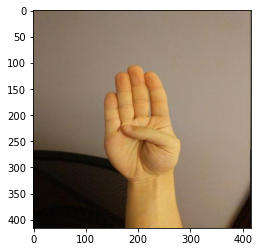

In [87]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [89]:
cap = cv2.VideoCapture(1)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [5]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [6]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [7]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\SSD_MobNet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\SSD_MobNet --output_directory=Tensorflow\workspace\models\SSD_MobNet\export


In [8]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [9]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\SSD_MobNet\export\saved_model Tensorflow\workspace\models\SSD_MobNet\tfjsexport


In [11]:
!{command}

Writing weight file Tensorflow\workspace\models\SSD_MobNet\tfjsexport\model.json...


2022-09-23 03:47:21.341336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-23 03:47:21.341403: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-23 03:47:30.857974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-23 03:47:30.858040: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-23 03:47:30.862572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-3QP3I93
2022-09-23 03:47:30.862714: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-3QP3I93
2022-09-23 03:47:30.863176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is

In [12]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [13]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [14]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\SSD_MobNet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\SSD_MobNet --output_directory=Tensorflow\workspace\models\SSD_MobNet\tfliteexport


In [15]:
!{command}

2022-09-23 03:49:39.640388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-23 03:49:39.640441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-23 03:49:47.892632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-09-23 03:49:47.892683: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-23 03:49:47.898680: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-3QP3I93
2022-09-23 03:49:47.898918: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-3QP3I93
2022-09-23 03:49:47.916874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is